In [4816]:
# Import dependencies
import pandas as pd
import hvplot.pandas
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

### Read the `heart.csv` data from the `Resources` folder into a Pandas DataFrame.

In [4817]:
# Reading in the heart.csv file
file_path = r'/Users/sandrabotica/Desktop/ML_Project_4/Resources/heart.csv'
# file_path = 'Resources/heart.csv'
# data = Path('Resources/heart.csv')
heart_df = pd.read_csv(file_path)
heart_df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### Data exploration

In [4818]:
# Checking datatypes, row number, column number and if any null values
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4819]:
# Summary statistics on DataFrame
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


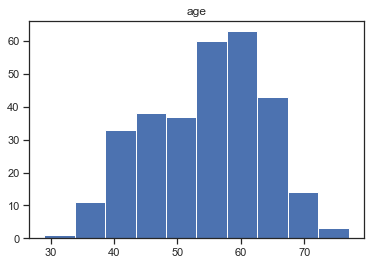

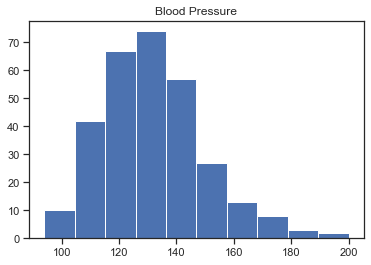

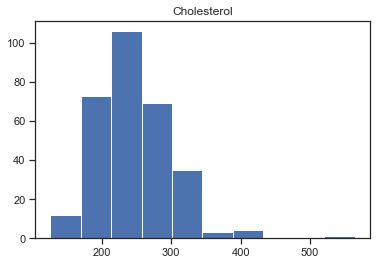

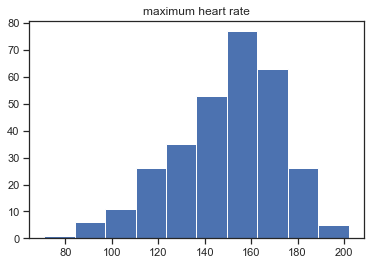

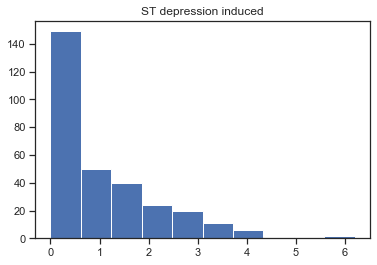

<Figure size 432x288 with 0 Axes>

In [4820]:
# Histograms on columns with continuous values
data_num = heart_df[['age','trtbps','chol','thalachh','oldpeak']]

for i in data_num.columns:
    
    plt.hist(data_num[i])

    if i=='trtbps':
        plt.title("Blood Pressure")
    elif i=='chol':
        plt.title("Cholesterol") 
    elif i=='thalachh':
        plt.title('maximum heart rate')
    elif i=='oldpeak':
        plt.title("ST depression induced")
    else:
        plt.title(i)
    plt.show()
    plt.savefig("Images/Fig1_5_Histograms.png", dpi=100)

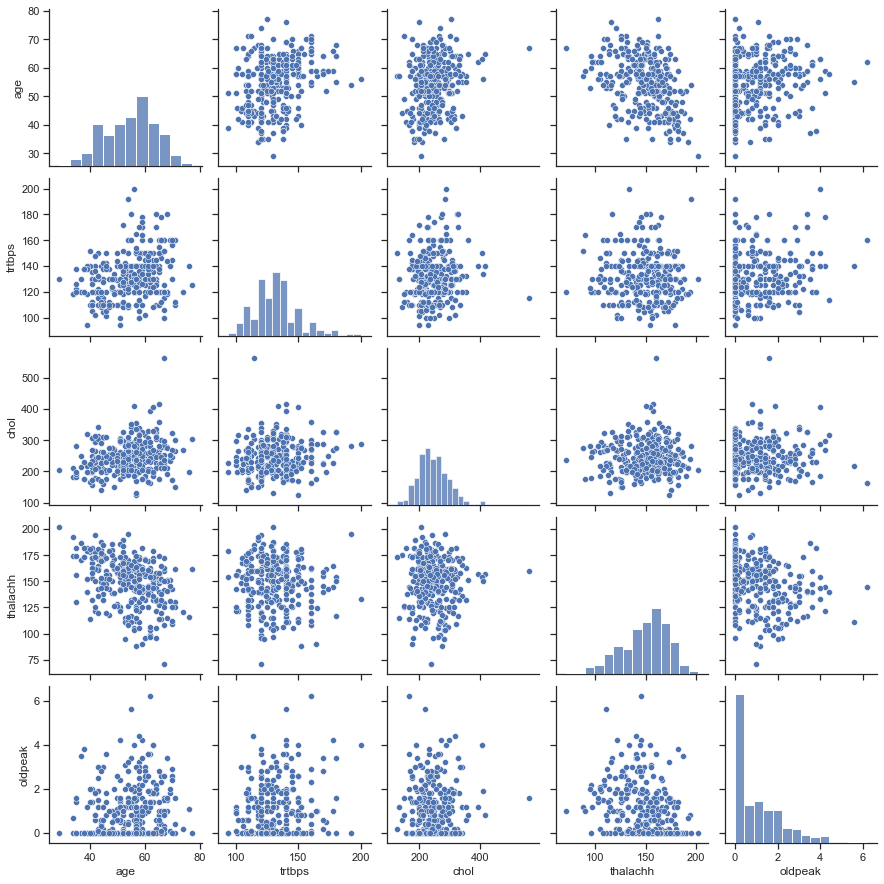

<Figure size 432x288 with 0 Axes>

In [4821]:
# Pairplot comparing columns with continuous values
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data_num)
plt.show()
plt.savefig("Images/Fig6_pairplot.png", dpi=100)

In [4822]:
# Value_counts for age column 
heart_df["age"].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [4823]:
# Value_counts for trtbps column 
heart_df["trtbps"].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trtbps, dtype: int64

In [4824]:
# Value_counts for chol column 
heart_df["chol"].value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

In [4825]:
# Value_counts for thalachh column 
heart_df["thalachh"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalachh, Length: 91, dtype: int64

In [4826]:
# Value_counts for oldpeak column 
heart_df["oldpeak"].value_counts()

0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64

In [4827]:
# Value_counts for sex column 
heart_df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

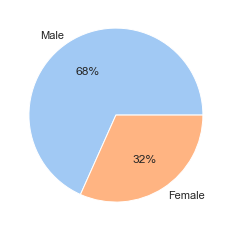

<Figure size 432x288 with 0 Axes>

In [4828]:
# Pie chart for sex column 
heart_df["sex"].value_counts()
colors = sns.color_palette('pastel')[0:5]
y = heart_df["sex"].value_counts()
labels = ["Male" , "Female"]
plt.pie(y, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
plt.savefig("Images/Fig7_sex_piechart.png", dpi=100)

In [4829]:
# Value_counts for cp column 
heart_df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

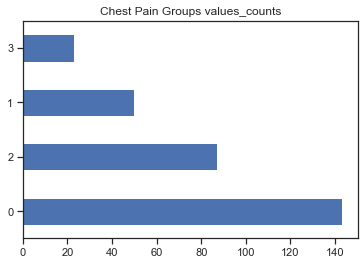

In [4830]:
# Value_counts for cp column 
heart_df["cp"].value_counts().plot(kind='barh', title="Chest Pain Groups values_counts")
plt.savefig("Images/Fig8_cp_barchart.png", dpi=100)

In [4831]:
# Value_counts for fbs column 
heart_df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

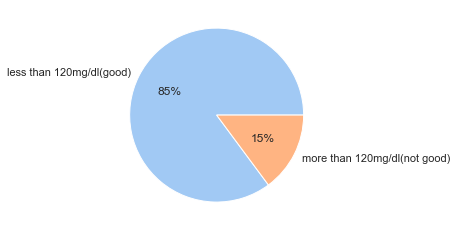

<Figure size 432x288 with 0 Axes>

In [4832]:
# Pie chart for fbs column 
heart_df["fbs"].value_counts()
colors = sns.color_palette('pastel')[0:5]
y = heart_df["fbs"].value_counts()
labels = ["less than 120mg/dl(good)" , "more than 120mg/dl(not good)"]
# plt.title=["Fasting Blood Sugar Groups values_counts"]
plt.pie(y, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
plt.savefig("Images/Fig9_fbs_piechart.png", dpi=100)

In [4833]:
# Value_counts for restecg column 
heart_df["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

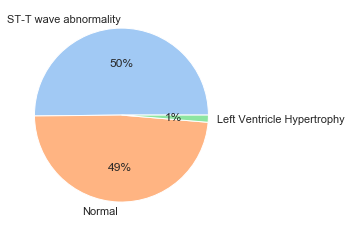

<Figure size 432x288 with 0 Axes>

In [4834]:
# Pie chart for restecg column 
heart_df["restecg"].value_counts()
colors = sns.color_palette('pastel')[0:5]
y = heart_df["restecg"].value_counts()
labels = ["ST-T wave abnormality" , "Normal", "Left Ventricle Hypertrophy"]
# title="Resting ECG Groups values_counts"
plt.pie(y, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
plt.savefig("Images/Fig10_restecg_piechart.png", dpi=100)

In [4835]:
# Value_counts for exng column 
heart_df["exng"].value_counts()

0    204
1     99
Name: exng, dtype: int64

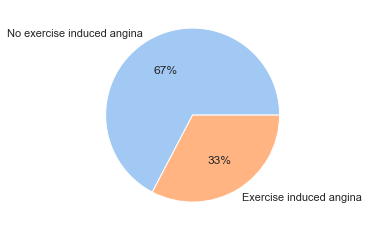

<Figure size 432x288 with 0 Axes>

In [4836]:
# Pie chart value_counts for exng column 
heart_df["exng"].value_counts()
colors = sns.color_palette('pastel')[0:5]
y = heart_df["exng"].value_counts()
labels = ["No exercise induced angina" , "Exercise induced angina"]
plt.pie(y, labels = labels, colors = colors, autopct='%.0f%%')
# title="Exercise Induced Angina Groups values_counts"
plt.show()
plt.savefig("Images/Fig11_exng_piechart.png", dpi=100)

In [4837]:
# Value_counts for slp column 
heart_df["slp"].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

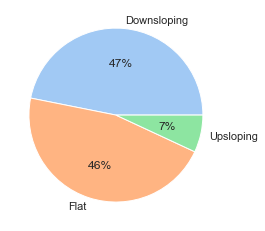

<Figure size 432x288 with 0 Axes>

In [4838]:
# Pie chart for slp column 
heart_df["slp"].value_counts()
colors = sns.color_palette('pastel')[0:5]
y = heart_df["slp"].value_counts()
labels = ["Downsloping" , "Flat", "Upsloping"]
# title="Slope of Peak Exercise ST Segment Group values_counts"
plt.pie(y, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
plt.savefig("Images/Fig11_slp_piechart.png", dpi=100)

In [4839]:
# Value_counts for caa column 
heart_df["caa"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

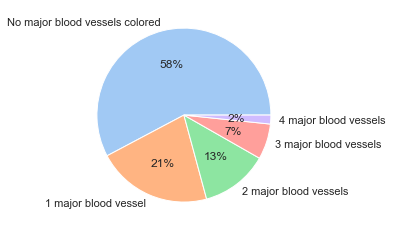

<Figure size 432x288 with 0 Axes>

In [4840]:
# Pie chart for caa column 
heart_df["caa"].value_counts()
colors = sns.color_palette('pastel')[0:5]
y = heart_df["caa"].value_counts()
labels = ["No major blood vessels colored" , "1 major blood vessel", "2 major blood vessels", "3 major blood vessels", "4 major blood vessels"]
# title="Coronary Artery Anomalies(No. of  major vessels) Group values_counts"
plt.pie(y, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
plt.savefig("Images/Fig12_caa_piechart.png", dpi=100)

In [4841]:
# Value_counts for thall column 
heart_df["thall"].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

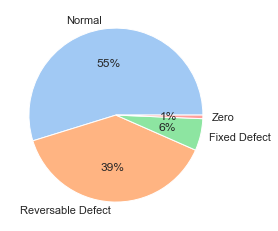

<Figure size 432x288 with 0 Axes>

In [4842]:
# Pie chart for thall column 
heart_df["thall"].value_counts()
colors = sns.color_palette('pastel')[0:5]
y = heart_df["thall"].value_counts()
labels = ["Normal" , "Reversable Defect", "Fixed Defect", "Zero"]
# title="Thalassemia Group values_counts"
plt.pie(y, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
plt.savefig("Images/Fig13_thall_piechart.png", dpi=100)

In [4843]:
# Value_counts for output column 
heart_df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

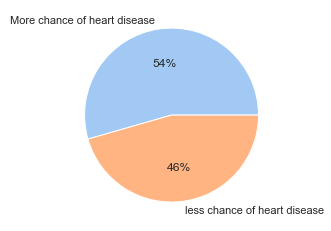

<Figure size 432x288 with 0 Axes>

In [4844]:
# Pie chart value_counts for output column 
heart_df["output"].value_counts()
colors = sns.color_palette('pastel')[0:5]
y = heart_df["output"].value_counts()
labels = [" More chance of heart disease " , "less chance of heart disease"]
plt.pie(y, labels = labels, colors = colors, autopct='%.0f%%')
# title="Output Group values_counts"
plt.show()
plt.savefig("Images/Fig14_output_piechart.png", dpi=100)

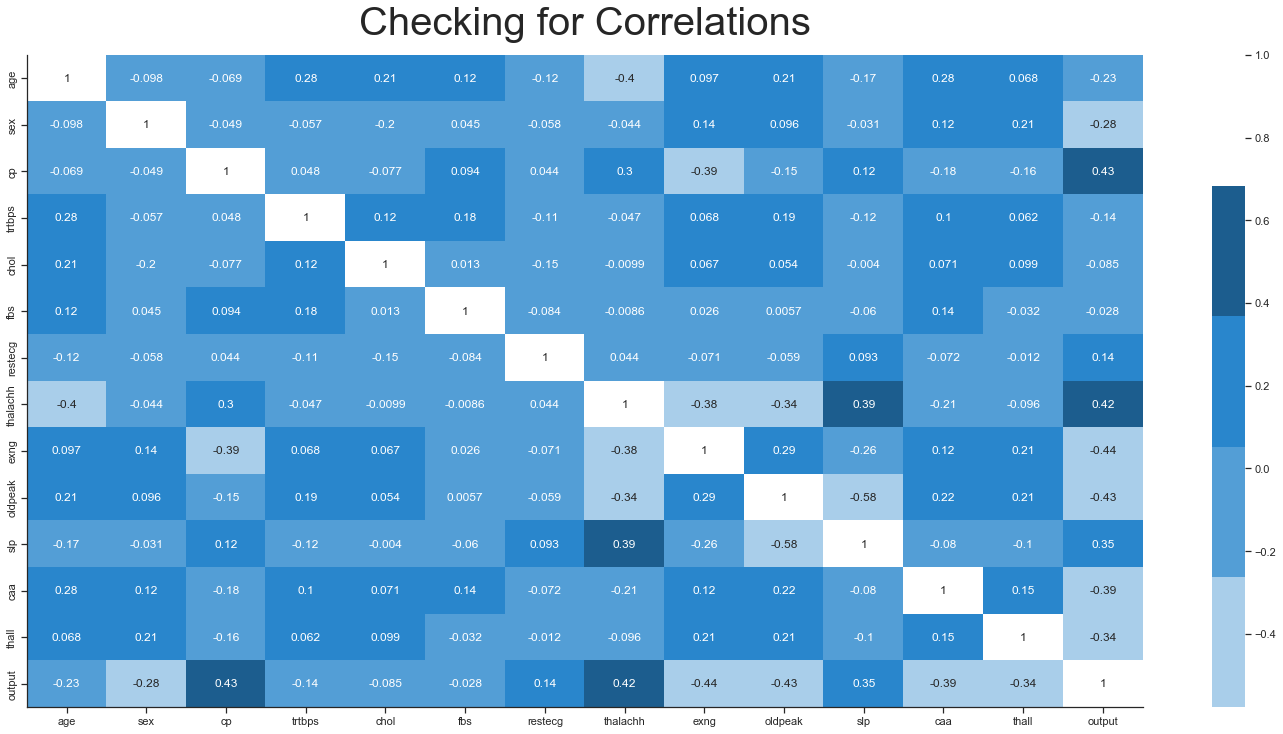

<Figure size 432x288 with 0 Axes>

In [4845]:
# Correlation matrix
plt.figure(figsize=[25,12])
heat = heart_df.corr()
sns.heatmap(heat, cmap=['#a9ceea','#539ed6','#2986cc','#1c5d8e','white'], annot=True)
plt.title("Checking for Correlations", size=40, pad=20)
sns.despine()
plt.show()
plt.savefig("Images/Fig15_correlation_matrix.png", dpi=100)

## Creating the labels set (`y`)  from the “output” column, and the features (`X`) DataFrame from the remaining columns.

In [4846]:
# Separate the y variable, the labels
y = heart_df["output"]

# Separate the X variable, the features
X = heart_df.drop(columns=['output'])

# # Alternate X variable, feature selection experiments
# X = heart_df.drop(columns=['age', 'trtbps', 'chol', 'fbs', 'restecg',
#      'slp',  'output'])

# X = heart_df.drop(columns=['cp', 'trtbps', 'chol', 'restecg', 'output'])

In [4847]:
# Review the X variable DataFrame
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4848]:
#Check the balance of the labels values/target variable(y)
y.value_counts()

1    165
0    138
Name: output, dtype: int64

## Split the Data into Training and Testing Sets

In [4849]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# # Alternate train_test_split options experimented with
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=1)

### Scaling the X features 

In [4850]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [4851]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [4852]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest Classifier

### Fitting the Random Forest Model

In [4853]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [4854]:
# Fitting the model
# rf_model = rf_model.fit(X_train_scaled, y_train)
rf_model = rf_model.fit(X_train, y_train)

# Fit the model and use .ravel()on the "y_train" data. 
# rf_model.fit(X_train, y_train.ravel())
# rf_model.fit(X_train_scaled, y_train.ravel())

### Making Predictions Using the Random Forest Model

In [4855]:
# Making predictions using the testing data
rf_testing_predictions = rf_model.predict(X_test)
# rf_testing_predictions = rf_model.predict(X_test_scaled)

# Printing DataFrame of Actual and Predicted results
rf_results = pd.DataFrame({"Prediction": rf_testing_predictions, "Actual": y_test}).reset_index(drop=True)
rf_results.head(10)

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,1,0
8,0,0
9,1,1


### Model Evaluation

In [4856]:
# Calculating the confusion matrix
rf_test_matrix = confusion_matrix(y_test, rf_testing_predictions)
rf_df = pd.DataFrame(
    rf_test_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
rf_acc_score = accuracy_score(y_test, rf_testing_predictions)

In [4857]:
# Displaying results
print("Confusion Matrix")
display(rf_df)
print(f"Accuracy Score : {rf_acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_testing_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,29,6
Actual 1,7,34


Accuracy Score : 0.8289473684210527
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.85      0.83      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



### Feature Importance

In [4858]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.14186125714187506, 'cp'),
 (0.1328584370638807, 'thalachh'),
 (0.11424785699754372, 'caa'),
 (0.10725615945878587, 'thall'),
 (0.1033909158556697, 'oldpeak'),
 (0.09561835727993867, 'age'),
 (0.07674703071786812, 'chol'),
 (0.0752778140813638, 'trtbps'),
 (0.046044756428246424, 'slp'),
 (0.04314178531520479, 'exng'),
 (0.0363722202766573, 'sex'),
 (0.017600432384427322, 'restecg'),
 (0.00958297699853855, 'fbs')]

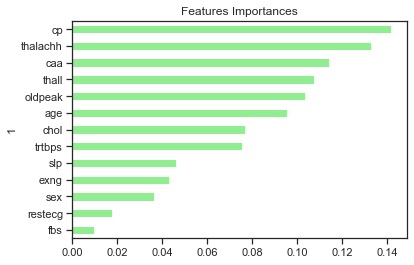

In [4859]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Creating a Logistic Regression Model with the original data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [4860]:
# Declare a logistic regression model and experiemnt with different solver's
lr_model = LogisticRegression(solver='lbfgs',random_state=1)
# lr_model = LogisticRegression(solver='liblinear',random_state=1)
# lr_model = LogisticRegression(solver='newton-cg',random_state=1)

# Fit and save the logistic regression model using the training data
lr_model.fit(X_train, y_train)

/Users/sandrabotica/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4861]:
# # Score the model
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.8502202643171806
Testing Data Score: 0.8552631578947368


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [4862]:
# Make a prediction using the testing data
lr_testing_predictions = lr_model.predict(X_test)
# lr_testing_predictions = lr_model.predict(X_test_scaled)
# Printing DataFrame of Actual and Predicted results
lr_results = pd.DataFrame({"Prediction": lr_testing_predictions, "Actual": y_test}).reset_index(drop=True)
lr_results.head(10)

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,1,0
8,0,0
9,1,1


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [4863]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, lr_testing_predictions)

0.851219512195122

In [4864]:
# Create and save the confusion matrix for the testing data
lr_test_matrix = confusion_matrix(y_test, lr_testing_predictions)
lr_df = pd.DataFrame(
    lr_test_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
lr_acc_score = accuracy_score(y_test, lr_testing_predictions)

In [4865]:
# Displaying results
print("Confusion Matrix")
display(lr_df)
print(f"Accuracy Score : {lr_acc_score}")
print("Classification Report")
print(classification_report(y_test, lr_testing_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,28,7
Actual 1,4,37


Accuracy Score : 0.8552631578947368
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.84      0.90      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (< 50% diameter narrowing. less chance of heart disease) and `1` (> 50% diameter narrowing. more chance of heart disease) labels?

**Answer:** The logistic regression model was better at predicting the `1` label then the `0` labels. This may be due to the bias of data having 41 `1`s and only 35 `0`s. 

A balanced_accuracy_score of 85% makes one think that this is a good prediction model, as does the 86% accuracy score in the classification report.

Based on the confusion matrix.
 - Total predictions = 76
 - Correct predictions = 65 (28 `0`s TN, 37 `1`s TP)
 - Incorrect predictions = 11 (7 `0`s FP, 4 `1`s at FN)

Based on the classification report.
 - Precision: 16% of the time (0.84 precision score) the model predicted a false positive (predicted a `1` but was actually a `0`), hence 7 people (from the confusion matrix) were identified as more chance of heart disease when they were less chance of heart disease, predicting a FALSE ALARM (Type 1 error).
 - Recall: 10% of the time (0.90 recall score) the model predicted a false negative (predicted a `0` but was actually a `1`), hence 4 people (from the confusion matrix) who had more chance of heart disease have been MISSED in the prediction (Type 2 error).

## Creating a Logistic Regression Model with scaled data

In [4866]:
# Declare a logistic regression model and experiemnt with different solver's
lr_model_scaled = LogisticRegression(solver='lbfgs',random_state=1)

# lr_model_scaled = LogisticRegression(solver='liblinear',random_state=1)
# lr_model_scaled = LogisticRegression(solver='newton-cg',random_state=1)
# lr_model_scaled = LogisticRegression(solver='sag',random_state=1)
# lr_model_scaled = LogisticRegression(solver='saga',random_state=1)


# Fit and save the logistic regression model using the scaled training data
lr_model_scaled.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4867]:
# Score the model
print(f"Training Data Score: {lr_model_scaled.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model_scaled.score(X_test_scaled, y_test)}")

Training Data Score: 0.8634361233480177
Testing Data Score: 0.8552631578947368


In [4868]:
# Make a prediction using the testing data
lr_scaled_testing_predictions = lr_model_scaled.predict(X_test_scaled)
# Printing DataFrame of Actual and Predicted results
lr_scaled_results = pd.DataFrame({"Prediction": lr_scaled_testing_predictions, "Actual": y_test}).reset_index(drop=True)
lr_scaled_results.head(10)

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,1,0
8,0,0
9,1,1


In [4869]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, lr_scaled_testing_predictions)

0.851219512195122

In [4870]:
# Create and save the confusion matrix for the testing data
lr_scaled_test_matrix = confusion_matrix(y_test, lr_scaled_testing_predictions)
lr_scaled_df = pd.DataFrame(
    lr_test_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
lr_scaled_acc_score = accuracy_score(y_test, lr_scaled_testing_predictions)

In [4871]:
# Displaying results
print("Confusion Matrix")
display(lr_scaled_df)
print(f"Accuracy Score : {lr_scaled_acc_score}")
print("Classification Report")
print(classification_report(y_test, lr_scaled_testing_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,28,7
Actual 1,4,37


Accuracy Score : 0.8552631578947368
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.84      0.90      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



## PCA - Principal Component Analysis for dimension reduction 

In [4872]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=2)
# pca = PCA(n_components=5)

In [4873]:
# Fit the PCA model on the heart_df DataFrame
heart_pca = pca.fit_transform(heart_df)

# Review the first 5 rows of list data
heart_pca[:5]

array([[-12.26772602,   2.87000191],
       [  2.68966168, -39.87386288],
       [-42.9506397 , -23.63953003],
       [-10.94520605, -28.44110112],
       [106.97858286, -15.87943559]])

In [4874]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.74751318, 0.15037261])

In [4875]:
# Create the PCA DataFrame
heart_pca_df = pd.DataFrame(
    heart_pca,
    columns=["PCA1", "PCA2"]
)

# heart_pca_df = pd.DataFrame(
#     heart_pca,
#     columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
# )
# Review the PCA DataFrame
heart_pca_df.head()

,PCA1,PCA2
0,-12.267726,2.870002
1,2.689662,-39.873863
2,-42.950640,-23.639530
3,-10.945206,-28.441101
4,106.978583,-15.879436


In [4876]:
heart_pca_df['output']=heart_df["output"]
heart_pca_df.head()

,PCA1,PCA2,output
0,-12.267726,2.870002,1
1,2.689662,-39.873863,1
2,-42.950640,-23.639530,1
3,-10.945206,-28.441101,1
4,106.978583,-15.879436,1


In [4877]:
y = heart_pca_df["output"]

In [4878]:
X = heart_pca_df.drop(columns=['output'])

In [4879]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)

In [4880]:
# Declare a logistic regression model.
# Apply a random_state of 1 to the model
lr_pca_model = LogisticRegression(solver='lbfgs',random_state=1)
# lr_model = LogisticRegression(solver='liblinear',random_state=1)
# lr_model = LogisticRegression(solver='newton-cg',random_state=1)


# Fit and save the logistic regression model using the training data
lr_pca_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4881]:
# Score the model
print(f"Training Data Score: {lr_pca_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_pca_model.score(X_test, y_test)}")

Training Data Score: 0.7136563876651982
Testing Data Score: 0.6842105263157895


In [4882]:
# Make a prediction using the testing data
lr_pca_testing_predictions = lr_pca_model.predict(X_test)
# Printing DataFrame of Actual and Predicted results
lr_pca_results = pd.DataFrame({"Prediction": lr_pca_testing_predictions, "Actual": y_test}).reset_index(drop=True)
lr_pca_results.head(10)

,Prediction,Actual
0,0,1
1,1,0
2,0,0
3,0,0
4,1,0
5,1,1
6,0,0
7,1,0
8,0,0
9,1,1


In [4883]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, lr_pca_testing_predictions)

0.6759581881533101

In [4884]:
# Create and save the confusion matrix for the testing data
lr_pca_test_matrix = confusion_matrix(y_test, lr_pca_testing_predictions)
lr_pca_df = pd.DataFrame(
    lr_pca_test_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
lr_pca_acc_score = accuracy_score(y_test, lr_pca_testing_predictions)

In [4885]:
# Displaying results
print("Confusion Matrix")
display(lr_pca_df)
print(f"Accuracy Score : {lr_pca_acc_score}")
print("Classification Report")
print(classification_report(y_test, lr_pca_testing_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,20,15
Actual 1,9,32


Accuracy Score : 0.6842105263157895
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.57      0.62        35
           1       0.68      0.78      0.73        41

    accuracy                           0.68        76
   macro avg       0.69      0.68      0.68        76
weighted avg       0.68      0.68      0.68        76

